# Decison Trees

First we'll load some synthetic data on past hires I made up.

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "C:/Users/Redi-user/PycharmProjects/pythonProject1/Datascience_project/PastHires_Internship.csv"
df = pd.read_csv(input_file, header = 0)

In [4]:
df.head(10)

,Years Experience,Currently Employed,Number of Previous employers,Level of Education,Attended Top University,Internship,Gap in Career,Improving Skillset,Different Domain,Current Domain,German Speaking,Willing to Travel,Can be considered for Hiring
0,16,N,1,PhD,N,N,Y,N,Y,mathematics,N,Y,Y
1,20,Y,0,PhD,N,Y,N,Y,N,Information Technology,N,N,Y
2,20,N,1,Graduation,N,Y,Y,N,N,Information Technology,Y,N,Y
3,20,N,2,Graduation,N,Y,Y,N,N,Information Technology,Y,N,Y
4,18,Y,2,Graduation,Y,Y,N,Y,N,Information Technology,N,Y,Y
5,18,Y,2,Graduation,N,Y,N,Y,Y,mathematics,N,Y,Y
6,18,N,2,Graduation,N,Y,N,Y,Y,mathematics,Y,Y,Y
7,17,Y,1,Graduation,N,Y,N,N,N,Information Technology,N,N,Y
8,16,N,4,Graduation,Y,Y,Y,Y,N,Information Technology,Y,N,Y
9,16,N,1,Graduation,Y,N,Y,Y,N,Information Technology,Y,N,Y


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2.

In [5]:
d = {'Y': 1, 'N': 0}
df['Can be considered for Hiring'] = df['Can be considered for Hiring'].map(d)
df['Currently Employed'] = df['Currently Employed'].map(d) 
df['Attended Top University'] = df['Attended Top University'].map(d)
df['Internship'] = df['Internship'].map(d)
df['Improving Skillset'] = df['Improving Skillset'].map(d)
df['Gap in Career'] = df['Gap in Career'].map(d)
df['Different Domain'] = df['Different Domain'].map(d)
df['German Speaking'] = df['German Speaking'].map(d)
df['Willing to Travel'] = df['Willing to Travel'].map(d)
d = {'Graduation': 0, 'Post-Graduation': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
d = {'physics': 0, 'Information Technology': 1, 'mathematics': 2 , 'Event Manager' : 3, 'taxi driver' :4,'nurse':5}
df['Current Domain'] = df['Current Domain'].map(d)
df.head()

,Years Experience,Currently Employed,Number of Previous employers,Level of Education,Attended Top University,Internship,Gap in Career,Improving Skillset,Different Domain,Current Domain,German Speaking,Willing to Travel,Can be considered for Hiring
0,16,0,1,2,0,0,1,0,1,2,0,1,1
1,20,1,0,2,0,1,0,1,0,1,0,0,1
2,20,0,1,0,0,1,1,0,0,1,1,0,1
3,20,0,2,0,0,1,1,0,0,1,1,0,1
4,18,1,2,0,1,1,0,1,0,1,0,1,1


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [6]:
features = list(df.columns[:12])
features

['Years Experience',
 'Currently Employed',
 'Number of Previous employers',
 'Level of Education',
 'Attended Top University',
 'Internship',
 'Gap in Career',
 'Improving Skillset',
 'Different Domain',
 'Current Domain',
 'German Speaking',
 'Willing to Travel']

Now actually construct the decision tree:

In [7]:
y = df["Can be considered for Hiring"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the time we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

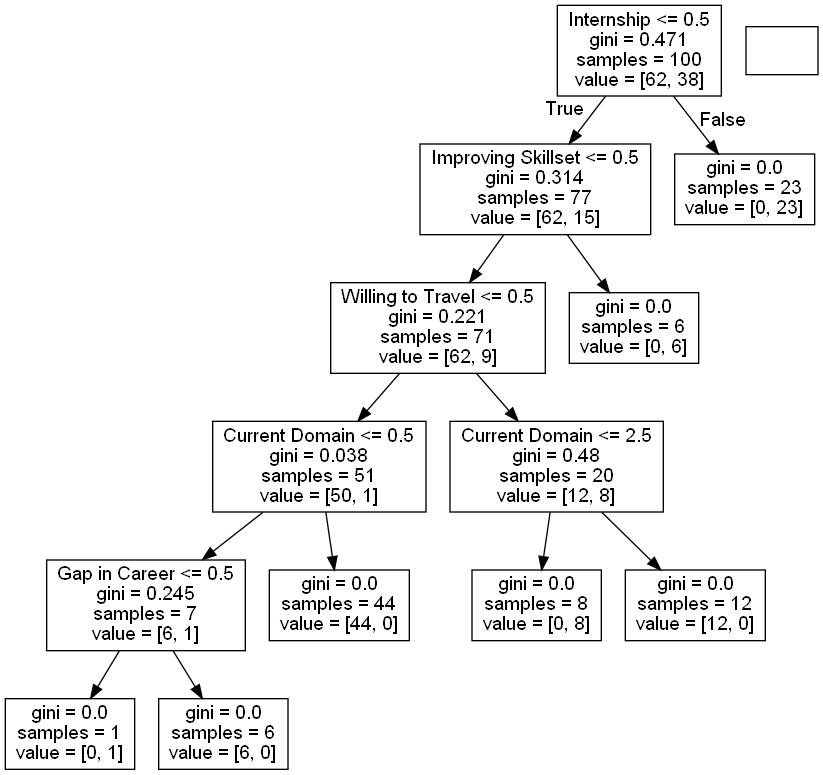

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
#import graphviz
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


## Ensemble learning: using a random forest

We'll use a random forest of 20 decision trees to predict employment of specific candidate profiles:

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X, y)

In [11]:
df.head(1)

,Years Experience,Currently Employed,Number of Previous employers,Level of Education,Attended Top University,Internship,Gap in Career,Improving Skillset,Different Domain,Current Domain,German Speaking,Willing to Travel,Can be considered for Hiring
0,16,0,1,2,0,0,1,0,1,2,0,1,1


In [12]:
# 8 years experienced, employed candidate (my case :) :) :)
print (clf.predict([[8, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]]))

# 20 years experienced who has never changed a job
print (clf.predict([[20, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]]))

# 20 years experienced who has no job currently but changed 10 jobs in the past
print (clf.predict([[20, 0, 10, 1, 1, 0, 0, 0, 1, 1, 1, 1]]))

# Ideal graduate fresher who went to top university, did intership, speaks German and willing to Travel. Star student :)
print (clf.predict([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]]))

# Taxi Driver who wants to purse I.T Career but not improving his skills
print (clf.predict([[4, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 1]]))

# Taxi Driver who wants to purse I.T Career who is improving his skills
print (clf.predict([[4, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1]]))

[1]
[0]
[0]
[1]
[0]
[1]
